# Рубежный контроль №2

## Афанасьев А.А. ИУ5-65Б Вариант 1

In [71]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [22]:
iris = load_iris()

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['iris species'])

In [26]:
# типы колонок
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
iris species         float64
dtype: object

In [27]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [28]:
print("Количество отсутствующих значений в датасете Iris:")
iris_df.isnull().sum()

Количество отсутствующих значений в датасете Iris:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris species         0
dtype: int64

In [29]:
iris_df['iris species'].unique()

array([0., 1., 2.])

In [30]:
iris_df['iris species'] = iris_df['iris species'].astype(int)

In [31]:
# типы колонок
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
iris species           int32
dtype: object

## Корреляционная матрица

<Axes: >

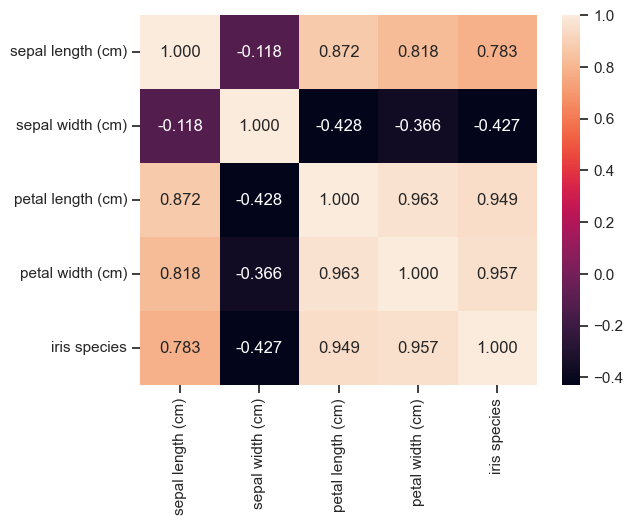

In [32]:
sns.heatmap(iris_df.corr(), annot=True, fmt='.3f')

#### На основании корреляционной матрицы можно сделать следующие выводы:
- Целевой признак сильно коррелирует длиной чашелистика (0.78). Этот признак следует оставить в модели.
- Целевой признак не коррелирует с шириной чашелистика (-0.43). Этот признак следует убрать из модели, так как скорее всего он только ухудшит её качество.
- Длина лепестка очень сильно коррелирует с шириной лепестка (0.96). Следовательно, в модели можно оставить только один из этих признаков. Лучше оставить ширину лепестка, так как он лучше коррелирует с целевым признаком (0.96) и при этом меньше коррелирует с длиной чашелистика (0.82 против 0.87 у длины лепестка).

## Разделение данных на обучающую и тестовую выборки

In [37]:
X = iris_df.drop(columns=['iris species', 'sepal width (cm)', 'petal length (cm)'])  # Признаки
y = iris_df['iris species']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
iris_X_train.shape, iris_y_train.shape

((120, 2), (120,))

In [39]:
iris_X_test.shape, iris_y_test.shape

((30, 2), (30,))

## Пропорции классов 

In [48]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [49]:
print_class_proportions(iris_df['iris species'])

Метка 	 Количество 	 Процент встречаемости
0 	 50 	 	 33.33%
1 	 50 	 	 33.33%
2 	 50 	 	 33.33%


## Метод опорных векторов

In [69]:
# Нормализация признаков
scaler = StandardScaler()
iris_X_train = scaler.fit_transform(iris_X_train)
iris_X_test = scaler.transform(iris_X_test)

# Обучение модели SVM
svm_model = SVC()  
svm_model.fit(iris_X_train, iris_y_train)

# Предсказания на тестовых данных
iris_y_pred = svm_model.predict(iris_X_test)

# Оценка производительности модели
accuracy = accuracy_score(iris_y_test, iris_y_pred)
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision = precision_score(iris_y_test, iris_y_pred, average='macro')
conf_matrix = confusion_matrix(iris_y_test, iris_y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9666666666666667
Precision: 0.9523809523809524
Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## Градиентный бустинг

In [72]:
# Нормализация признаков
scaler = StandardScaler()
iris_X_train = scaler.fit_transform(iris_X_train)
iris_X_test = scaler.transform(iris_X_test)

# Обучение модели градиентного бустинга
gbc_model = GradientBoostingClassifier()
gbc_model.fit(iris_X_train, iris_y_train)

# Предсказания на тестовых данных
iris_y_pred = gbc_model.predict(iris_X_test)

# Оценка производительности модели
accuracy = accuracy_score(iris_y_test, iris_y_pred)
precision = precision_score(iris_y_test, iris_y_pred, average='macro')
conf_matrix = confusion_matrix(iris_y_test, iris_y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9333333333333333
Precision: 0.9166666666666666
Confusion Matrix:
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


## Градиентный бустинг с подобранными гиперпараметрами 

In [76]:
from sklearn.model_selection import GridSearchCV
# Нормализация признаков
scaler = StandardScaler()
iris_X_train = scaler.fit_transform(iris_X_train)
iris_X_test = scaler.transform(iris_X_test)

# Параметры для подбора гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Обучение модели градиентного бустинга с подбором гиперпараметров
gbc_model = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(iris_X_train, iris_y_train)

# Наилучшие гиперпараметры
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Предсказания на тестовых данных с лучшей моделью
iris_y_pred = grid_search.best_estimator_.predict(iris_X_test)

# Оценка производительности модели
accuracy = accuracy_score(iris_y_test, iris_y_pred)
precision = precision_score(iris_y_test, iris_y_pred, average='macro')
conf_matrix = confusion_matrix(iris_y_test, iris_y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print('Confusion Matrix:')
print(conf_matrix)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.9666666666666667
Precision: 0.9523809523809524
Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


## Вывод:

Метод опорных векторов показал немного лучшее качество, по сравнению с градиентным бустингом, но при подборе оптимальных гиперпараметров качество обеих моделей сравнялось.